# Machine Learning Task 1

##  Import necessary libraries and load Boston housing price data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

data=pd.read_csv("boston.csv")

x=data.iloc[:,:-1].values  # 自变量
y=data.iloc[:,-1].values   # 因变量

# Split input data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)


## See if there are any missing values in the data.

In [2]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PIRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Linear regression model
### (1) Training a linear regression model using the least squares method
  The least squares method can transform the error equation into a system of algebraic equations with definite solutions (whose number of equations is exactly equal to the number of unknowns), thus solving for these unknown parameters. This algebraic equation system with a definite solution is called the normal equation estimated by the least squares method.
  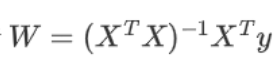

In [3]:
# Add constant term (intercept)
x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]
x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]

# Solving weights using the least squares method
weight=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

# Calculate mean square error on training set 
y_train_pred=x_train.dot(weight)
MSE = np.mean((y_train_pred-y_train)**2)
print("MSE of the least squares linear model:",MSE)

y_predict=x_test.dot(weight)

MSE of the least squares linear model: 22.7375901544866


### (2)  Calculate the average mean squared error (MSE) on training set via 10-fold cross validation.
K-fold cross validation, the initial sampling is divided into K sub samples, with one individual sub sample retained as the data for validating the model, and the other K-1 samples used for training. Cross validation is repeated K times, with each subsample validated once. The average result of K times or other combination methods are used to obtain a single estimate. The advantage of this method is that it repeatedly uses randomly generated sub samples for training and validation, with each result validated once. 10 fold cross validation is the most commonly used method.

In [4]:
# 设置交叉验证的折数
k = 10
n = len(x_train)
fold_size = n // k

# 初始化均方误差列表
mse_scores = []

# 手动实现交叉验证
for i in range(k):
    start = i * fold_size
    end = (i + 1) * fold_size if i < k - 1 else n
    x_val_fold = x_train[start:end]
    y_val_fold = y_train[start:end]

    x_train_fold = np.concatenate([x_train[:start], x_train[end:]], axis=0)
    y_train_fold = np.concatenate([y_train[:start], y_train[end:]], axis=0)

    # 用最小二乘法训练模型
    weight = np.linalg.inv(x_train_fold.T.dot(x_train_fold)).dot(x_train_fold.T).dot(y_train_fold)

    # 进行预测
    y_pred = x_val_fold.dot(weight)

    # 计算均方误差
    mse = np.mean((y_val_fold - y_pred) ** 2)
    mse_scores.append(mse)

# 计算平均均方误差
average_mse = np.mean(mse_scores)
print("The average MSE via 10-fold cross validation:", average_mse)

The average MSE via 10-fold cross validation: 24.72903662395199


## Ridge regression model

### （1）Use 10-fold cross validation to select appropriate parameters

In [5]:
# 因为在线性回归中添加了偏置项，改变了数据维度，所以重新划分训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

# 创建模型（定义岭回归）
ridge_model=Ridge()

# 参数字典
param_test={'alpha':[0.01,0.03,0.05,0.07,0.1,0.5,0.8,1]}

# 定义模型调参
gsearch=GridSearchCV(estimator=ridge_model, param_grid=param_test,scoring='neg_mean_squared_error',cv=10)

# 训练模型
gsearch.fit(x_train,y_train)

# 查看最合适的参数
print(gsearch.best_params_)
print(gsearch.best_score_)

{'alpha': 0.03}
-24.906993034823397


### （2）Create a model with the best parameters and evaluate it

In [6]:
ridge_model = Ridge(alpha=0.3)

# 训练模型
ridge_model.fit(x_train,y_train)

# 训练集
y_train_pred = ridge_model.predict(x_train)
print('Train MSE=',mean_squared_error(y_train,y_train_pred))

# 测试集
y_test_pred = ridge_model.predict(x_test)
print('Test MSE=',mean_squared_error(y_test,y_test_pred))


Train MSE= 22.77107809313988
Test MSE= 14.853121042582119


## Exploratory data analysis

### (1) Plot the distribution of the target variable

<function matplotlib.pyplot.show(close=None, block=None)>

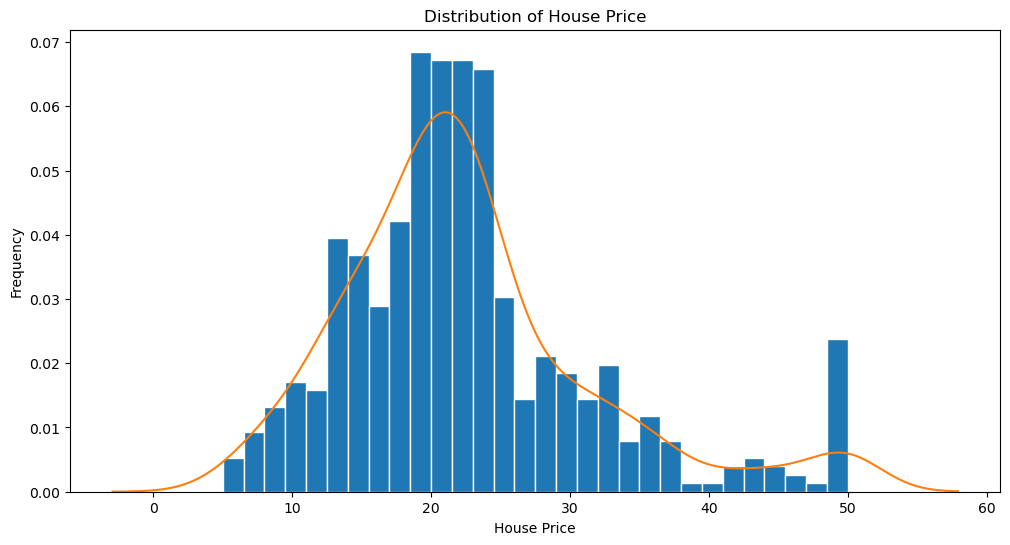

In [7]:
plt.figure(figsize=(12,6))
plt.hist(y, bins=30, density=True,edgecolor="white")
sns.kdeplot(y)
plt.title("Distribution of House Price")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.show

### (2) Create a correlation matrix that measures the linear relationships between the variables and plot the correlation matrix

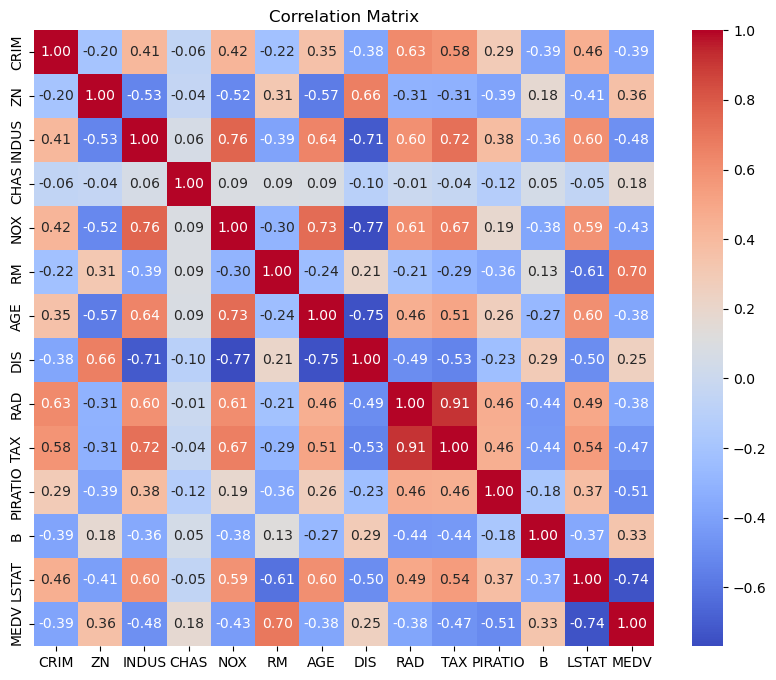

In [8]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### (3) plot a scatter plot between the original house price and predicted house prices

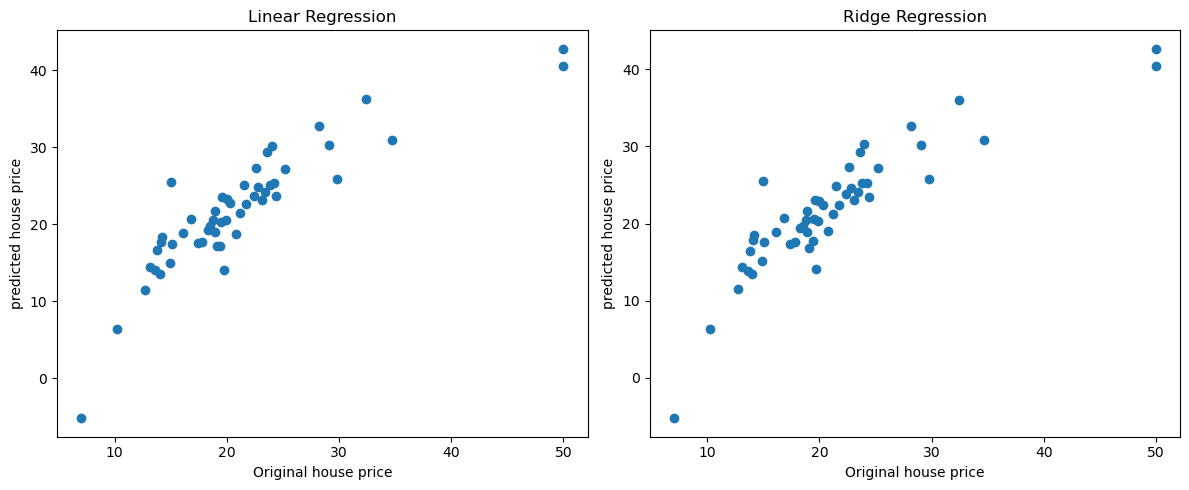

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(y_test, y_predict)
plt.title("Linear Regression")
plt.xlabel("Original house price")
plt.ylabel("predicted house price")

plt.subplot(122)
plt.scatter(y_test, y_test_pred)
plt.title("Ridge Regression")
plt.xlabel("Original house price")
plt.ylabel("predicted house price")

plt.tight_layout()
plt.show()
